Trend 1: As the number of drivers in an area increases, the average fair decreases. At a certain point though, when the driver count per city is large enough, the average fair remains the same as driver count increases. 

Trend 2: As the number of drivers in an area increases, each driver makes less money. For example, rural drivers make up only 3% of the data set but their total fares were 7% of all fares, but urban drivers make up 78% of the drivers and produce only 63% of the fares.

Trend 3: As you move from urban to suburban to rural environments the variance of the average fares increases.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [88]:
rided = pd.read_csv('ride_data.csv')
cityd = pd.read_csv('city_data.csv')


In [89]:
#Group ride data set by city
rided_grouped = rided.groupby(['city'], as_index = False)
#Create DF with average fare per city
price_average = pd.DataFrame(rided_grouped['fare'].mean())
#Create DF with number of rides per city
total_rides = pd.DataFrame(rided_grouped['fare'].count())
#There is one duplicate city in the dataset. This next line just combines the two entries for that city.
cleaned_cityd = cityd.groupby(['city', 'type'], as_index = False)
driver_count = pd.DataFrame(cleaned_cityd.sum())

#All DFs from above are merged by city into a new DF called merge 2
merge1 = pd.merge(price_average, total_rides, suffixes= ['_avg', '_rides'], on = 'city')
merge2 = pd.merge(merge1, driver_count, on = 'city')




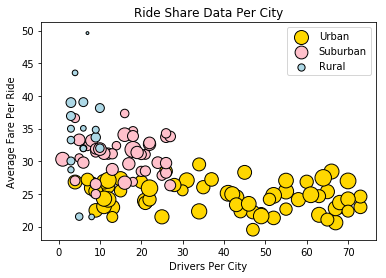

In [90]:

#the merge2 DF is split into three DFs, each one with a different type.
urban = merge2.loc[merge2.iloc[:,3] == 'Urban', :]
suburban = merge2.loc[merge2.iloc[:,3] == 'Suburban', :]
rural = merge2.loc[merge2.iloc[:,3] == 'Rural', :]

#To make a bubble plot, three scatterplots are generated, one for each type. 
urb = plt.scatter(urban['driver_count'], urban['fare_avg'], s = urban['fare_rides'] *8, color = 'Gold', edgecolor = 'black')
sub = plt.scatter(suburban['driver_count'], suburban['fare_avg'], s = suburban['fare_rides'] *8, color = 'pink', edgecolor = 'black')
rur = plt.scatter(rural['driver_count'], rural['fare_avg'], s = rural['fare_rides'] *8, color ='lightblue',edgecolor = 'black')
plt.xlabel("Drivers Per City")
plt.ylabel("Average Fare Per Ride")                       
plt.title('Ride Share Data Per City')
plt.legend(handles=[urb, sub, rur], labels=['Urban', 'Suburban', 'Rural'])

plt.show()

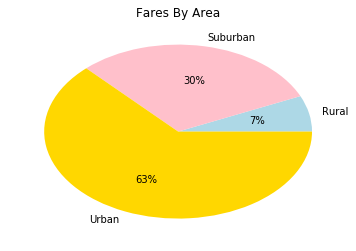

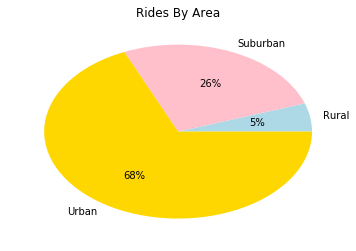

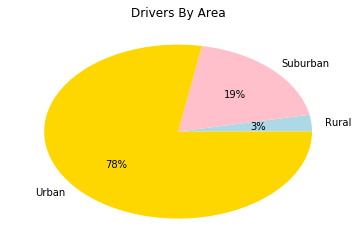

In [91]:
# calculate and insert total fares per city column.
totalfares = np.array(merge2['fare_rides']) * np.array(merge2['fare_avg'])
merge2['totalfares'] = totalfares

#group merge2 by type
pie = merge2.groupby(['type'])
pie = pd.DataFrame(pie.sum())

plt.pie(pie['totalfares'], labels = pie.index, colors = ['lightblue','pink', 'gold'], autopct='%1.0f%%')
plt.title('Fares By Area')
plt.show()

plt.pie(pie['fare_rides'], labels = pie.index, colors = ['lightblue','pink', 'gold'], autopct='%1.0f%%')
plt.title('Rides By Area')
plt.show()

plt.pie(pie['driver_count'], labels = pie.index, colors = ['lightblue','pink', 'gold'], autopct='%1.0f%%')
plt.title('Drivers By Area')
plt.show()
